# 1.0 - Imports

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

from autots import AutoTS
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## 1.1 - Setting Directory

In [239]:
os.chdir(r'C:\Users\Anwar Hermuche\Desktop\Datasets\Degecoin prediction')

## 1.2 - Loading Data

In [240]:
df_doge_raw = pd.read_csv(r'DOGE-USD.csv', encoding = 'cp1252', low_memory = False)

In [241]:
# Visualizing top 5 rows in dataset
df_doge_raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270


# 2.0 - Data Description

In [242]:
# Backup
df2 = df_doge_raw.copy()

## 2.1 - Data Dimension

In [243]:
print(f'We have {df2.shape[0]} rows and {df2.shape[1]} columns in our dataset')

We have 1736 rows and 7 columns in our dataset


## 2.2 - Data Types

In [244]:
df2.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

We can see that date is an object dtype. Let's turn it into a datetime dtype.

In [245]:
# Turn into a datetime64[ns] dtype
df2['Date'] = pd.to_datetime(df2['Date'], format = '%Y-%m-%d')

## 2.3 - Missing Values

In [246]:
df2.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## 2.4 - Statistical Analysis

In [247]:
df2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1.736000e+03
mean,0.059436,0.062977,0.055970,0.059487,0.059487,1.022258e+09
std,0.102014,0.109895,0.094330,0.102068,0.102068,3.587876e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002543,0.002609,0.002491,0.002542,0.002542,2.275153e+07
50%,0.003444,0.003570,0.003319,0.003439,0.003439,8.707966e+07
75%,0.070073,0.075339,0.068212,0.070082,0.070082,6.602850e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


It seems that the "Adj Close" column it's equal to "Close" column. Let's explore it more deeper

In [248]:
# Expression to count the number of different values of "Close" and "Adj Close" for the same row

n_rows = df2.shape[0]
s = 0
for k in range(n_rows):
    if df2.Close.values.tolist()[k] == df2['Adj Close'].values.tolist()[k]:
        s += 1
print(f'We have {s} equal values, i.e. {100*s/n_rows}% of total rows')

We have 1736 equal values, i.e. 100.0% of total rows


Indeed, it's a duplicate column. So we can exclude this column without any problem.

In [249]:
df2.drop('Adj Close', axis = 1, inplace = True)

# 3.0 - Extracting Features

In [250]:
# Backup
df3 = df2.copy()

Now, we're gonna create new columns for each element of "Date" column, like Year, Month, Day, Day of Week etc 

In [251]:
# Creating the Year column
df3['Year'] = df3['Date'].apply(lambda x: x.year)

In [252]:
# Creating the Month column
df3['Month'] = df3['Date'].apply(lambda x: x.month)

In [253]:
# Creating the Day column
df3['Day'] = df3['Date'].apply(lambda x: x.day)

In [254]:
# Creating the Day of Week column
df3['Day of Week'] = df3['Date'].apply(lambda x: x.isoweekday())

# 4.0 - Descriptive Analysis

In [255]:
# backup
df4 = df3.copy()

## 4.1 - Close Price and Time

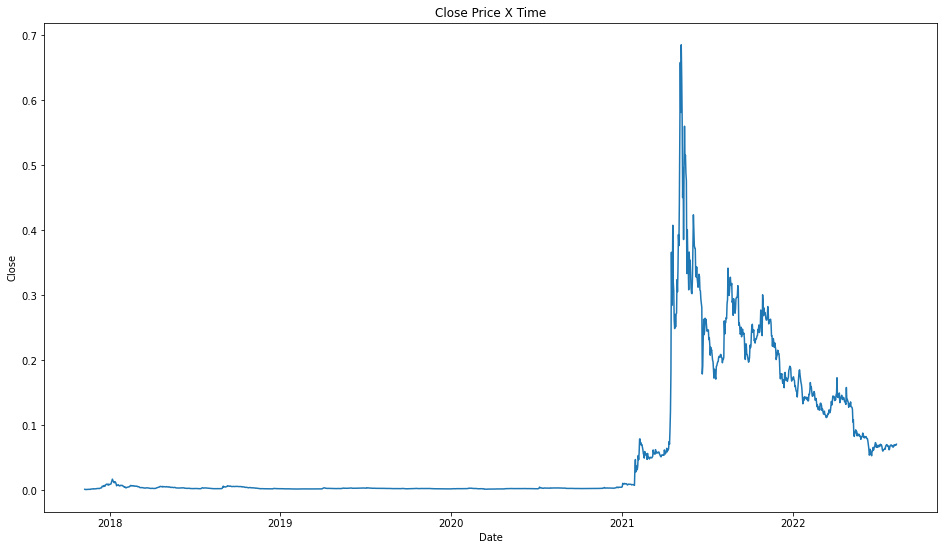

In [256]:
# Visualizing the price during the time
plt.figure(figsize = (16, 9))
sns.lineplot(x = 'Date', y = 'Close', data = df4)
plt.title('Close Price X Time')
plt.show();

We can see that it basically starts growing in 2021. So let's visualize this graph between 01/01/2021 and 31/12/2021 and from 01/01/2022 till today

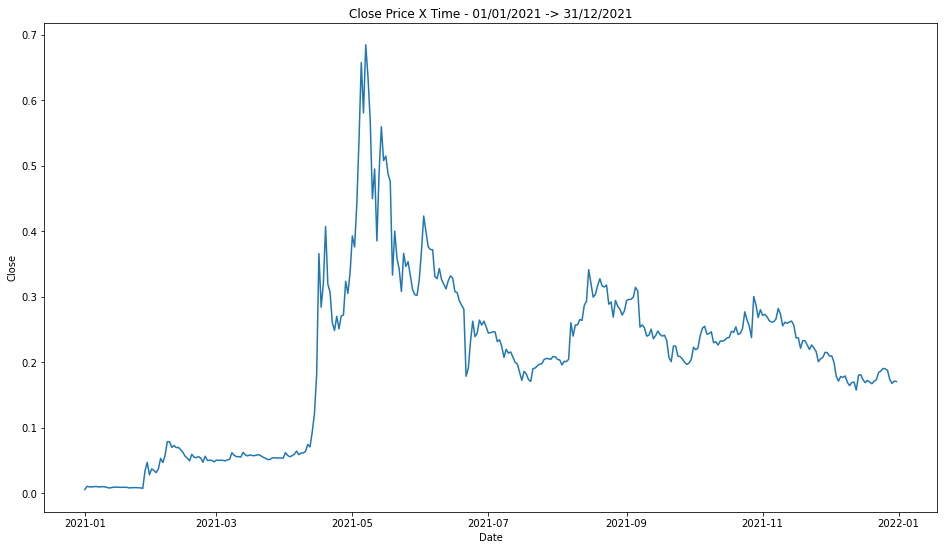

In [257]:
# Visualizing the price between 01/01/2021 and 31/12/2021
plt.figure(figsize = (16, 9))
sns.lineplot(x = df4[(df4['Date'] >= '01/01/2021') & (df4['Date'] <= '31/12/2021')]['Date'], y = 'Close', data = df4)
plt.title('Close Price X Time - 01/01/2021 -> 31/12/2021')
plt.show();

In this period, we reach the maximum close price of dogecoin. Let's see what is the exact date

In [258]:
df4[df4['Close'] == df4['Close'].values.max()]['Date'].values[0]

numpy.datetime64('2021-05-07T00:00:00.000000000')

As we can see, the maximum close price was in May, or more precisely 05/07/2021

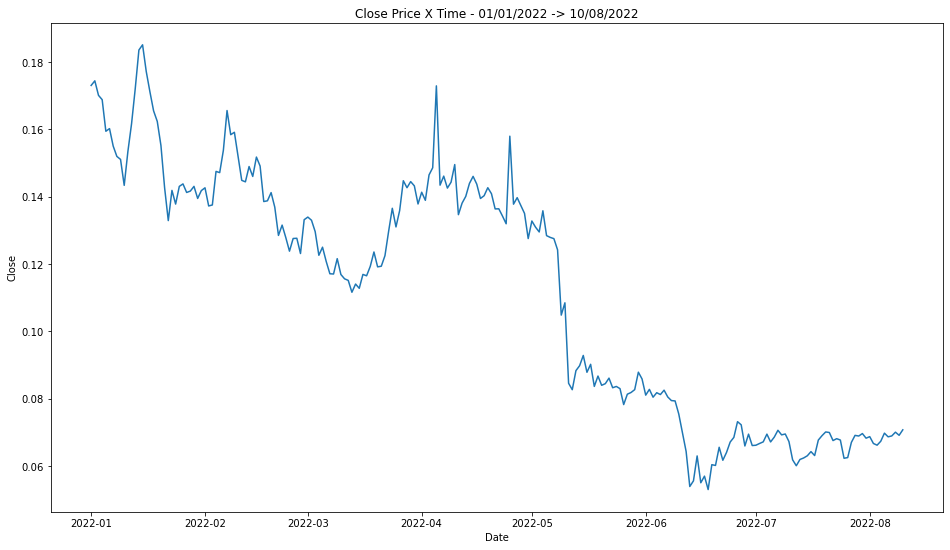

In [259]:
# Visualizing the price between 01/01/2022 and 10/08/2022 (Today)
plt.figure(figsize = (16, 9))
sns.lineplot(x = df4[(df4['Date'] >= '01/01/2022') & (df4['Date'] <= '10/08/2022')]['Date'], y = 'Close', data = df4)
plt.title('Close Price X Time - 01/01/2022 -> 10/08/2022')
plt.show();

## 4.2 - Daily price variation

In [260]:
# Let's create a new column with the difference between the Open and Close price
df4['Price Variation'] = df4.apply(lambda x: x['Open'] - x['Close'], axis = 1) 

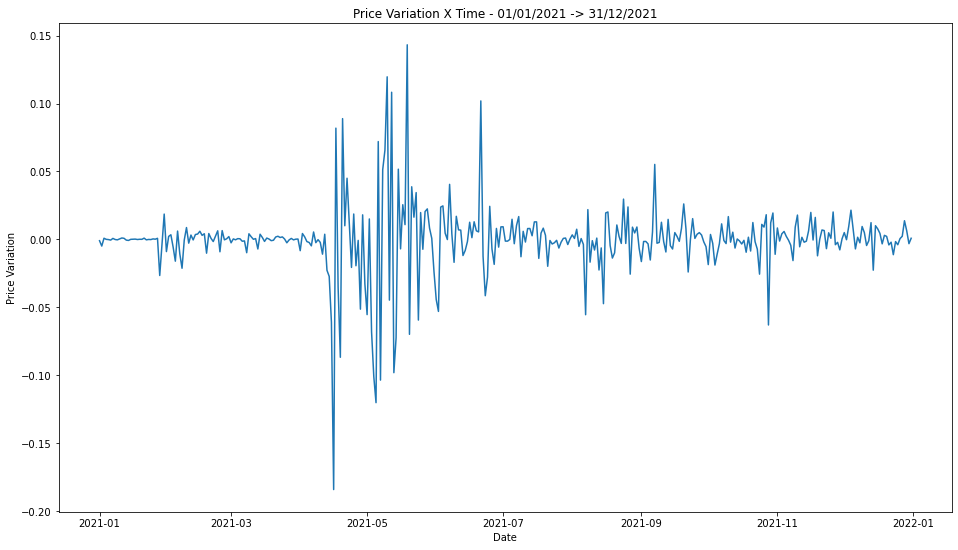

In [261]:
# Visualizing the daily price variation between 01/01/2021 and 31/12/2021
plt.figure(figsize = (16, 9))
sns.lineplot(x = df4[(df4['Date'] >= '01/01/2021') & (df4['Date'] <= '31/12/2021')]['Date'], y = 'Price Variation', data = df4)
plt.title('Price Variation X Time - 01/01/2021 -> 31/12/2021')
plt.show();

It has a lot of positive and negative variations. Let's count exactly how many of each we have

In [262]:
# Number of positive price variation
num_pos_var = len([k for k in df4['Price Variation'].values if k > 0])

# Number of negative price variation
num_neg_var = len([k for k in df4['Price Variation'].values if k < 0])

# Number of no price variation
num_no_var = len([k for k in df4['Price Variation'].values if k == 0])

print(f'We had {num_pos_var} days with positive price variation; {num_neg_var} days with negative price variation; and {num_no_var} days with no price variation')

We had 884 days with positive price variation; 844 days with negative price variation; and 8 days with no price variation


Now, calculating the maximum negative and positive price variation

In [263]:
# Maximum positive price variation
max_pos_var = max([k for k in df4['Price Variation'].values if k > 0])

# Minimum 
min_pos_var = min([k for k in df4['Price Variation'].values if k < 0])

print(f'The maximum postive price variation was {round(max_pos_var, 4)}. And the minimum negative price variation was {round(min_pos_var, 4)}')

The maximum postive price variation was 0.1433. And the minimum negative price variation was -0.1843


## 4.3 - Monthly price variation

In [264]:
# Creating a Dataframe with the corresponding Year, Month and variation
aux_list = list()
months_var = list()
date = list()
for year in df4['Year'].unique():
    for month in sorted(df4['Month'].unique()):
        try:
            iprice = df4[(df4['Year'] == year) & (df4['Month'] == month)].sort_values('Day', ascending = True)['Close'].values[0]
            fprice = df4[(df4['Year'] == year) & (df4['Month'] == month)].sort_values('Day', ascending = False)['Close'].values[0]
            month_var = round(fprice - iprice, 4)
            aux_list.append([year, month, month_var])
        except:
            aux_list.append([year, month, 'NoData'])
for element in aux_list:
    if element[2] != "NoData":
        date.append(str(element[0]) + '/' + str(element[1]))
        months_var.append(element[2])
df_aux_month_var = pd.DataFrame({'Monthly Variation': months_var,
                                 'Date': date})

In [265]:
# First 5 rows
df_aux_month_var.head()

,Monthly Variation,Date
0,0.0007,2017/11
1,0.0068,2017/12
2,-0.0029,2018/1
3,0.0010,2018/2
4,-0.0034,2018/3


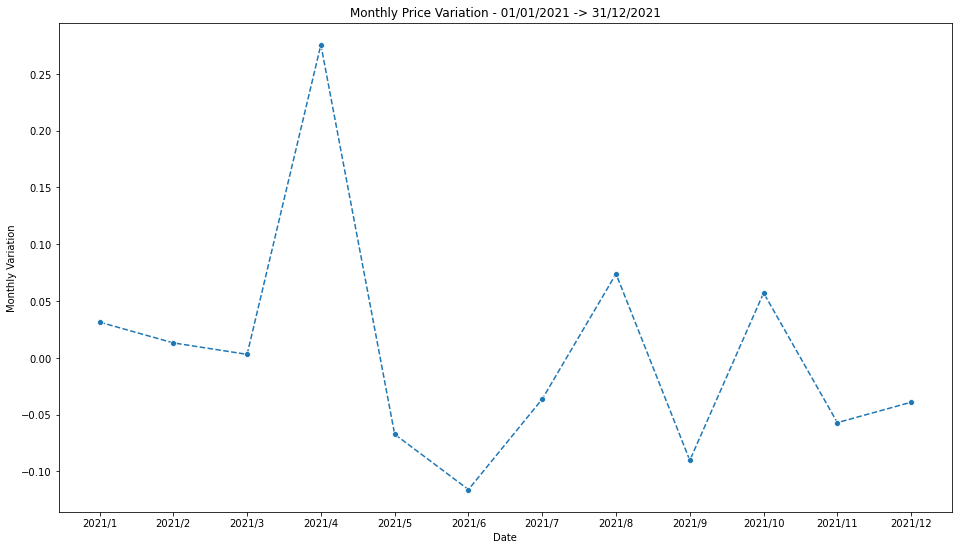

In [266]:
# Visualizing the monthly price variation between 01/01/2021 and 31/12/2021
plt.figure(figsize = (16, 9))
sns.lineplot(x = 'Date', y = 'Monthly Variation', data = df_aux_month_var.iloc[38:50, :], marker = 'o', linestyle = '--')
plt.title('Monthly Price Variation - 01/01/2021 -> 31/12/2021')
plt.show();

In [267]:
# Number of positive price variation
num_pos_var = len([k for k in df_aux_month_var.iloc[38:50, :]['Monthly Variation'].values if k > 0])

# Number of negative price variation
num_neg_var = len([k for k in df_aux_month_var.iloc[38:50, :]['Monthly Variation'].values if k < 0])

# Number of no price variation
num_no_var = len([k for k in df_aux_month_var.iloc[38:50, :]['Monthly Variation'].values if k == 0])

print(f'We had {num_pos_var} months with positive price variation; {num_neg_var} months with negative price variation; and {num_no_var} months with no price variation')

We had 6 months with positive price variation; 6 months with negative price variation; and 0 months with no price variation


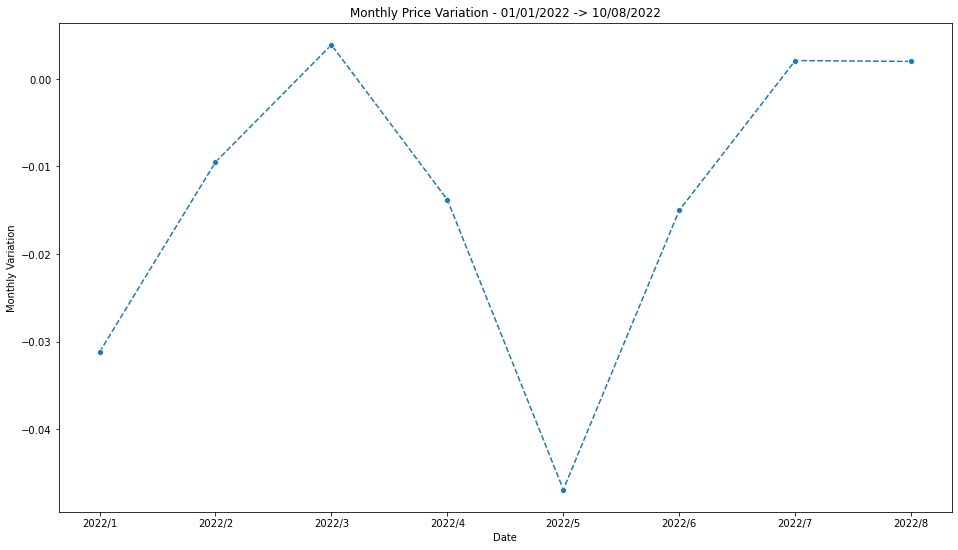

In [268]:
# Visualizing the monthly price variation between 01/01/2022 and 10/08/2022
plt.figure(figsize = (16, 9))
sns.lineplot(x = 'Date', y = 'Monthly Variation', data = df_aux_month_var.iloc[50:, :], marker = 'o', linestyle = '--')
plt.title('Monthly Price Variation - 01/01/2022 -> 10/08/2022')
plt.show();

In [269]:
# Number of positive price variation
num_pos_var = len([k for k in df_aux_month_var.iloc[50:, :]['Monthly Variation'].values if k > 0])

# Number of negative price variation
num_neg_var = len([k for k in df_aux_month_var.iloc[50:, :]['Monthly Variation'].values if k < 0])

# Number of no price variation
num_no_var = len([k for k in df_aux_month_var.iloc[50:, :]['Monthly Variation'].values if k == 0])

print(f'We had {num_pos_var} months with positive price variation; {num_neg_var} months with negative price variation; and {num_no_var} months with no price variation')

We had 3 months with positive price variation; 5 months with negative price variation; and 0 months with no price variation


## 4.4 - Analysing time and profit

In [270]:
day_inter = list()
initial_date = list()
final_date = list()
profit = list()
for ind, value in enumerate(df4.Open.values):
    for k in range(ind, len(df4.Open.values)):
        if df4.High.values[k] >= 2*value:
            initial_date.append(df4.Date.values[ind])
            final_date.append(df4.Date.values[k])
            day_inter.append(df4.Date.values[k] - df4.Date.values[ind])
            profit.append(round(df4.High.values[k]/value, 2))
            
profits_df = pd.DataFrame({'Initial Date': initial_date,
                           'Final Date': final_date,
                           'Days interval': day_inter,
                           'Profit': profit})

### 4.4.1 - Average time to at least duplicate the value invested (2017)

In [311]:
# Average number of days
av_day = profits_df[(profits_df['Initial Date'] >= '2017-11-09') & (profits_df['Final Date'] <= '2017-12-31') & (profits_df['Profit'] <= 3)]['Days interval'].mean()

# Average profit
av_prof = profits_df[(profits_df['Initial Date'] >= '2017-11-09') & (profits_df['Final Date'] <= '2017-12-31')]['Profit'].mean()

# Max profit
max_prof = profits_df[(profits_df['Initial Date'] >= '2017-11-09') & (profits_df['Final Date'] <= '2017-12-31')]['Profit'].max()

# Auxiliar Dataframe
aux_max_prof = profits_df[(profits_df['Initial Date'] >= '2017-11-09') & (profits_df['Final Date'] <= '2017-12-31') & (profits_df['Profit'] == max_prof)]

# Max profit - Initial Date
max_initial_date = datetime.datetime.strptime(str(aux_max_prof['Initial Date'].values[0]), '%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y/%m/%d")

# Max profit - Final Date
max_final_date = datetime.datetime.strptime(str(aux_max_prof['Final Date'].values[0]), '%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y/%m/%d")

# Max profit - Days interval
max_days_inter = aux_max_prof['Days interval'].values[0].astype('timedelta64[D]')/np.timedelta64(1, 'D')

print(f'In 2017, the average number of days to have a profit between 100% and 200% was {str(av_day)} hours')
print(f'The average profit was {round(av_prof, 2)}x')
print(f'Finally, the max profit was {max_prof}x, and it happened between {max_initial_date} and {max_final_date}, i.e. {max_days_inter} days')

In 2017, the average number of days to have a profit between 100% and 200% was 17 days 21:15:25.714285714 hours
The average profit was 4.25x
Finally, the max profit was 10.26x, and it happened between 2017/11/13 and 2017/12/25, i.e. 42.0 days


### 4.4.2 - Average time to at least duplicate the value invested (2018)

In [312]:
# Average number of days
av_day = profits_df[(profits_df['Initial Date'] >= '2018-01-01') & (profits_df['Final Date'] <= '2018-12-31') & (profits_df['Profit'] <= 3)]['Days interval'].mean()

# Average profit
av_prof = profits_df[(profits_df['Initial Date'] >= '2018-01-01') & (profits_df['Final Date'] <= '2018-12-31')]['Profit'].mean()

# Max profit
max_prof = profits_df[(profits_df['Initial Date'] >= '2018-01-01') & (profits_df['Final Date'] <= '2018-12-31')]['Profit'].max()

# Auxiliar Dataframe
aux_max_prof = profits_df[(profits_df['Initial Date'] >= '2018-01-01') & (profits_df['Final Date'] <= '2018-12-31') & (profits_df['Profit'] == max_prof)]

# Max profit - Initial Date
max_initial_date = datetime.datetime.strptime(str(aux_max_prof['Initial Date'].values[0]), '%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y/%m/%d")

# Max profit - Final Date
max_final_date = datetime.datetime.strptime(str(aux_max_prof['Final Date'].values[0]), '%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y/%m/%d")

# Max profit - Days interval
max_days_inter = aux_max_prof['Days interval'].values[0].astype('timedelta64[D]')/np.timedelta64(1, 'D')

print(f'In 2018, the average number of days to have a profit between 100% and 200% was {str(av_day)} hours')
print(f'The average profit was {round(av_prof, 2)}x')
print(f'Finally, the max profit was {max_prof}x, and it happened between {max_initial_date} and {max_final_date}, i.e. {max_days_inter} days')

In 2018, the average number of days to have a profit between 100% and 200% was 74 days 04:01:19.558011050 hours
The average profit was 2.31x
Finally, the max profit was 3.07x, and it happened between 2018/08/15 and 2018/09/10, i.e. 26.0 days


### 4.4.3 - Average time to at least duplicate the value invested (2019)

In [313]:
# Average number of days
av_day = profits_df[(profits_df['Initial Date'] >= '2019-01-01') & (profits_df['Final Date'] <= '2019-12-31') & (profits_df['Profit'] <= 3)]['Days interval'].mean()

# Average profit
av_prof = profits_df[(profits_df['Initial Date'] >= '2019-01-01') & (profits_df['Final Date'] <= '2019-12-31')]['Profit'].mean()

# Max profit
max_prof = profits_df[(profits_df['Initial Date'] >= '2019-01-01') & (profits_df['Final Date'] <= '2019-12-31')]['Profit'].max()

# Auxiliar Dataframe
aux_max_prof = profits_df[(profits_df['Initial Date'] >= '2019-01-01') & (profits_df['Final Date'] <= '2019-12-31') & (profits_df['Profit'] == max_prof)]

# Max profit - Initial Date
max_initial_date = datetime.datetime.strptime(str(aux_max_prof['Initial Date'].values[0]), '%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y/%m/%d")

# Max profit - Final Date
max_final_date = datetime.datetime.strptime(str(aux_max_prof['Final Date'].values[0]), '%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y/%m/%d")

# Max profit - Days interval
max_days_inter = aux_max_prof['Days interval'].values[0].astype('timedelta64[D]')/np.timedelta64(1, 'D')

print(f'In 2019, the average number of days to have a profit between 100% and 200% was {str(av_day)} hours')
print(f'The average profit was {round(av_prof, 2)}x')
print(f'Finally, the max profit was {max_prof}x, and it happened between {max_initial_date} and {max_final_date}, i.e. {max_days_inter} days')

In 2019, the average number of days to have a profit between 100% and 200% was 108 days 05:17:55.324675324 hours
The average profit was 2.15x
Finally, the max profit was 2.42x, and it happened between 2019/02/08 and 2019/07/05, i.e. 147.0 days


### 4.4.4 - Average time to at least duplicate the value invested (2020)

In [314]:
# Average number of days
av_day = profits_df[(profits_df['Initial Date'] >= '2020-01-01') & (profits_df['Final Date'] <= '2020-12-31') & (profits_df['Profit'] <= 3)]['Days interval'].mean()

# Average profit
av_prof = profits_df[(profits_df['Initial Date'] >= '2020-01-01') & (profits_df['Final Date'] <= '2020-12-31')]['Profit'].mean()

# Max profit
max_prof = profits_df[(profits_df['Initial Date'] >= '2020-01-01') & (profits_df['Final Date'] <= '2020-12-31')]['Profit'].max()

# Auxiliar Dataframe
aux_max_prof = profits_df[(profits_df['Initial Date'] >= '2020-01-01') & (profits_df['Final Date'] <= '2020-12-31') & (profits_df['Profit'] == max_prof)]

# Max profit - Initial Date
max_initial_date = datetime.datetime.strptime(str(aux_max_prof['Initial Date'].values[0]), '%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y/%m/%d")

# Max profit - Final Date
max_final_date = datetime.datetime.strptime(str(aux_max_prof['Final Date'].values[0]), '%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y/%m/%d")

# Max profit - Days interval
max_days_inter = aux_max_prof['Days interval'].values[0].astype('timedelta64[D]')/np.timedelta64(1, 'D')

print(f'In 2020, the average number of days to to have a profit between 100% and 200% was {str(av_day)} hours')
print(f'The average profit was {round(av_prof, 2)}x')
print(f'Finally, the max profit was {max_prof}x, and it happened between {max_initial_date} and {max_final_date}, i.e. {max_days_inter} days')

In 2020, the average number of days to to have a profit between 100% and 200% was 209 days 06:57:03.360833696 hours
The average profit was 2.27x
Finally, the max profit was 3.52x, and it happened between 2020/03/13 and 2020/07/08, i.e. 117.0 days


### 4.4.5 - Average time to at least duplicate the value invested (2021)

In [315]:
# Average number of days
av_day = profits_df[(profits_df['Initial Date'] >= '2021-01-01') & (profits_df['Final Date'] <= '2021-12-31') & (profits_df['Profit'] <= 3)]['Days interval'].mean()

# Average profit
av_prof = profits_df[(profits_df['Initial Date'] >= '2021-01-01') & (profits_df['Final Date'] <= '2021-12-31')]['Profit'].mean()

# Max profit
max_prof = profits_df[(profits_df['Initial Date'] >= '2021-01-01') & (profits_df['Final Date'] <= '2021-12-31')]['Profit'].max()

# Auxiliar Dataframe
aux_max_prof = profits_df[(profits_df['Initial Date'] >= '2021-01-01') & (profits_df['Final Date'] <= '2021-12-31') & (profits_df['Profit'] == max_prof)]

# Max profit - Initial Date
max_initial_date = datetime.datetime.strptime(str(aux_max_prof['Initial Date'].values[0]), '%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y/%m/%d")

# Max profit - Final Date
max_final_date = datetime.datetime.strptime(str(aux_max_prof['Final Date'].values[0]), '%Y-%m-%dT%H:%M:%S.%f000').strftime("%Y/%m/%d")

# Max profit - Days interval
max_days_inter = aux_max_prof['Days interval'].values[0].astype('timedelta64[D]')/np.timedelta64(1, 'D')

print(f'In 2021, the average number of days to have a profit between 100% and 200% was {str(av_day)} hours')
print(f'The average profit was {round(av_prof, 2)}x')
print(f'Finally, the max profit was {max_prof}x, and it happened between {max_initial_date} and {max_final_date}, i.e. {max_days_inter} days')

In 2021, the average number of days to have a profit between 100% and 200% was 172 days 17:55:01.657458564 hours
The average profit was 12.22x
Finally, the max profit was 157.57x, and it happened between 2021/01/01 and 2021/05/08, i.e. 127.0 days


### 4.4.6 - Average time to at least duplicate the value invested (2022)

In 2022, there's no investment with more or equal than 100% profit

# 5.0 - The prediction

In [282]:
# Backup
df5 = df4.copy()

In [284]:
# Creating the object to predict 
ts = AutoTS(forecast_length=14, 
            frequency='infer', 
            ensemble='simple', 
            max_generations = 10,
            drop_data_older_than_periods=200,
            n_jobs = -1,
            random_seed = 0)

In [285]:
# Fitting the model
ts = ts.fit(df5, date_col='Date', value_col='Close', id_col=None)

Inferred frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
6/6 [==============================] - 8s 8ms/step - loss: 0.1979
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1929
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1916
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1909
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1904
Epoch 6/50
6/6 [==============================] - 0s 3ms/step - l

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 38 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 38: MultivariateRegression
Model Number: 39 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 39: DatepartRegression
Model Number: 40 with model SeasonalNaive in generation 0 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 41 with model DatepartRegression in generation 0 of 10
Model Number: 42 with model UnobservedComponents in generation 0 of 10
Model Number: 43 with model UnobservedComponents in generation 0 of 10
Model Number: 44 with model ETS in generation 0 of 10
Model Number: 45 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 45: VECM
Model Number: 46 with model ARDL in generation 0 of 10
Model Number: 47 with model MultivariateMotif in generation 0 of 10
Model Number: 48 with model MultivariateMotif in generation 0 of 10
Model Number: 49 with model UnivariateMotif in generation 0 of 10
Model Number: 50 with model UnivariateMotif in generation 0 of 10
Model Number: 51 with model SectionalMotif in generation 0 of 10
Model Number: 52 with model SectionalMotif in generation 0 of 10
Model Number: 53 with model MultivariateRegression in generation 0 of 10
Model Number: 54 with model FBProphet in generation 0 of 10
Template E

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 58 with model Theta in generation 0 of 10
Model Number: 59 with model UnivariateRegression in generation 0 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 59: UnivariateRegression
Model Number: 60 with model ConstantNaive in generation 0 of 10
Model Number: 61 with model LastValueNaive in generation 0 of 10
Template Eval Error: ValueError('Model LastValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 61: LastValueNaive
Model Number: 62 with model AverageValueNaive in generation 0 of 10
Model Number: 63 with model GLS in generation 0 of 10
Model Number: 64 with model SeasonalNaive in generation 0 of 10
Model Number: 65 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 65: GLM
Model Nu

Model Number: 133 with model LastValueNaive in generation 0 of 10
Model Number: 134 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 134: VECM
Model Number: 135 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 135: VECM
Model Number: 136 with model WindowRegression in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 136: WindowRegression
Model Number: 137 with model UnivariateMotif in generation 0 of 10
Model Number: 138 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 138: ARDL
Model Number: 139 with model GLS in generation 0 of 10
Model Number: 140 with model DatepartRegression in generation 0 of 10
Model Number: 141 with model DatepartRegression in generation 0 of 10
Model Number: 142 with model

Model Number: 221 with model MultivariateMotif in generation 1 of 10
Model Number: 222 with model UnivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 222: UnivariateRegression
Model Number: 223 with model SectionalMotif in generation 1 of 10
Model Number: 224 with model MultivariateRegression in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 224: MultivariateRegression
Model Number: 225 with model DatepartRegression in generation 1 of 10
Model Number: 226 with model AverageValueNaive in generation 1 of 10
Model Number: 227 with model MultivariateRegression in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 227: MultivariateRegression
Model Number: 228 with model LastValueNaive in generation 1 of 10
Model Number: 229 with model UnivariateMotif in generation 1 of 10
Model Number: 230 with 

Model Number: 330 with model GLS in generation 2 of 10
Model Number: 331 with model NVAR in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 331: NVAR
Model Number: 332 with model MultivariateRegression in generation 2 of 10
Model Number: 333 with model UnivariateMotif in generation 2 of 10
Model Number: 334 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Close with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 335 with model NVAR in generation 2 of 10
Model Number: 336 with model NVAR in generation 2 of 10
Model Number: 337 with model LastValueNaive in generation 2 of 10
Model Number: 338 with model UnivariateMotif in generation 2 of 10
Model Number: 339 with model NVAR in generation 2 of 10
Model Number: 340 with model UnobservedComponents in generatio

Model Number: 376 with model ConstantNaive in generation 2 of 10
Model Number: 377 with model NVAR in generation 2 of 10
Model Number: 378 with model GLS in generation 2 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 378: GLS
Model Number: 379 with model UnivariateMotif in generation 2 of 10
Model Number: 380 with model UnobservedComponents in generation 2 of 10
Model Number: 381 with model NVAR in generation 2 of 10
Model Number: 382 with model UnobservedComponents in generation 2 of 10
Model Number: 383 with model LastValueNaive in generation 2 of 10
Model Number: 384 with model SectionalMotif in generation 2 of 10
Model Number: 385 with model WindowRegression in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 385: WindowRegression
Model Number: 386 with model UnivariateMotif in generation 2 of 10
Model Number: 387 with model AverageValueNaive in generation 2 of 10
Model Number: 388 with model D

Model Number: 473 with model ConstantNaive in generation 3 of 10
Model Number: 474 with model UnivariateMotif in generation 3 of 10
Model Number: 475 with model GLM in generation 3 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 475: GLM
Model Number: 476 with model Theta in generation 3 of 10
Model Number: 477 with model DatepartRegression in generation 3 of 10
Model Number: 478 with model UnobservedComponents in generation 3 of 10
Model Number: 479 with model ARDL in generation 3 of 10
Model Number: 480 with model SectionalMotif in generation 3 of 10
Model Number: 481 with model SeasonalNaive in generation 3 of 10
Model Number: 482 with model GLS in generation 3 of 10
Model Number: 483 with model NVAR in generation 3 of 10
Model Number: 484 with model NVAR in generation 3 of 10
Model Number: 485 with model ConstantNaive in gener

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 514 with model ETS in generation 4 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 515 with model ARDL in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 515: ARDL
Model Number: 516 with model ETS in generation 4 of 10
Model Number: 517 with model ConstantNaive in generation 4 of 10
Model Number: 518 with model ConstantNaive in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 518: ConstantNaive
Model Number: 519 with model ARDL in generation 4 of 10
Model Number: 520 with model Theta in generation 4 of 10
Model Number: 521 with model SeasonalNaive in generation 4 of 10
Model Number: 522 with model DatepartRegression in generation 4 of 10
Model Number: 523 with model NVAR in generation 4 of 10
Model Number: 524 with model UnobservedComponents in generation 4 of 10
Model Number: 525 with model DatepartRegression in generation 4 of 10
Model Number: 526 with model NVAR in generation 4 of 10
Model Number: 527 with model SectionalMotif in generation 4 of 10
Model Nu

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 566 with model ConstantNaive in generation 4 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 567 with model ARDL in generation 4 of 10
Model Number: 568 with model SectionalMotif in generation 4 of 10
Model Number: 569 with model Theta in generation 4 of 10
Model Number: 570 with model MultivariateMotif in generation 4 of 10
Model Number: 571 with model ConstantNaive in generation 4 of 10
Model Number: 572 with model ARDL in generation 4 of 10
Model Number: 573 with model SeasonalNaive in generation 4 of 10
Model Number: 574 with model SectionalMotif in generation 4 of 10
Model Number: 575 with model SeasonalNaive in generation 4 of 10
Model Number: 576 with model Theta in generation 4 of 10
Model Number: 577 with model MultivariateMotif in generation 4 of 10
Model Number: 578 with model LastValueNaive in generation 4 of 10
Model Number: 579 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 580 with model Theta in generation 4 of 10
Model Number: 581 with model LastValueNaive in generation 4 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 582 with model ConstantNaive in generation 4 of 10
Model Number: 583 with model ConstantNaive in generation 4 of 10
Model Number: 584 with model SectionalMotif in generation 4 of 10
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 584: SectionalMotif
Model Number: 585 with model SectionalMotif in generation 4 of 10
Model Number: 586 with model UnivariateMotif in generation 4 of 10
Model Number: 587 with model UnobservedComponents in generation 4 of 10
Model Number: 588 with model SectionalMotif in generation 4 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 588: SectionalMotif
Model Number: 589 with model SectionalMotif in generation 4 of 10
Model Number: 590 with model ConstantNaive in generation 4 of 10
Model Number: 591 with model ConstantNaive in generation 4 of 10
Model Number: 592 with model UnobservedComponents in generation 4 of 10
Model Number: 593 with model GLS in

Model Number: 636 with model GLS in generation 5 of 10
Model Number: 637 with model UnobservedComponents in generation 5 of 10
Model Number: 638 with model DatepartRegression in generation 5 of 10
Model Number: 639 with model UnobservedComponents in generation 5 of 10
Model Number: 640 with model MultivariateRegression in generation 5 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 641 with model NVAR in generation 5 of 10
Model Number: 642 with model Theta in generation 5 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 643 with model Theta in generation 5 of 10
Model Number: 644 with model UnivariateMotif in generation 5 of 10
Model Number: 645 with model ETS in generation 5 of 10
Model Number: 646 with model ARDL in generation 5 of 10
Model Number: 647 with model AverageValueNaive in generation 5 of 10
Model Number: 648 with model NVAR in generation 5 of 10
Model Number: 649 with model ETS in generation 5 of 10
Model Number: 650 with model LastValueNaive in generation 5 of 10
Model Number: 651 with model ConstantNaive in generation 5 of 10
Model Number: 652 with model MultivariateMotif in generation 5 of 10
Model Number: 653 with model UnobservedComponents in generation 5 of 10
Model Number: 654 with model MultivariateMotif in generation 5 of 10
Model Number: 655 with model SectionalMotif in generation 5 of 10
Model Number: 656 with model DatepartRegression in generation 5 of 10
Model Number: 657 with model DatepartRegression in generation 5 of 10
Model Number: 658 with model Sectional

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 664 with model SectionalMotif in generation 5 of 10
Model Number: 665 with model ConstantNaive in generation 5 of 10
Model Number: 666 with model SectionalMotif in generation 5 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 667 with model Theta in generation 5 of 10
Model Number: 668 with model SectionalMotif in generation 5 of 10
Model Number: 669 with model UnivariateMotif in generation 5 of 10
Model Number: 670 with model UnivariateMotif in generation 5 of 10
Model Number: 671 with model ConstantNaive in generation 5 of 10
Model Number: 672 with model ARDL in generation 5 of 10
Template Eval Error: IndexError('tuple index out of range') in model 672: ARDL
Model Number: 673 with model DatepartRegression in generation 5 of 10
Model Number: 674 with model SeasonalNaive in generation 5 of 10
Model Number: 675 with model LastValueNaive in generation 5 of 10
Model Number: 676 with model SectionalMotif in generation 5 of 10
Model Number: 677 with model MultivariateMotif in generation 5 of 10
Model Number: 678 with model AverageValueNaive in generation 5 of 10
Model Number: 679 with model ETS in generation 5 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Close wit

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 714 with model Theta in generation 6 of 10
Model Number: 715 with model NVAR in generation 6 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 715: NVAR
Model Number: 716 with model UnivariateRegression in generation 6 of 10
Model Number: 717 with model LastValueNaive in generation 6 of 10
Model Number: 718 with model UnivariateMotif in generation 6 of 10
Model Number: 719 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 719: DatepartRegression
Model Number: 720 with model SectionalMotif in generation 6 of 10
Model Number: 721 with model UnobservedComponents in generation 6 of 10
Model Number: 722 with model LastValueNaive in generation 6 of 10
Model Number: 723 with model UnivariateMotif in generation 6 of 10
Model Number: 724 with model NVAR in generation 6 of 10
Model Number: 725 with model UnobservedComponents in generation 6 of 10
Model N

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 778 with model WindowRegression in generation 6 of 10
Model Number: 779 with model NVAR in generation 6 of 10
Model Number: 780 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 780: SectionalMotif
Model Number: 781 with model MultivariateRegression in generation 6 of 10
Model Number: 782 with model ConstantNaive in generation 6 of 10
Model Number: 783 with model MultivariateRegression in generation 6 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 784 with model WindowRegression in generation 6 of 10
Model Number: 785 with model GLM in generation 6 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


New Generation: 7 of 10
Model Number: 786 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 786: DatepartRegression
Model Number: 787 with model Theta in generation 7 of 10
Model Number: 788 with model UnivariateMotif in generation 7 of 10
Model Number: 789 with model SectionalMotif in generation 7 of 10
Model Number: 790 with model NVAR in generation 7 of 10
Model Number: 791 with model UnobservedComponents in generation 7 of 10
Model Number: 792 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or more series. fail_on_forecast_nan=True') in model 792: UnobservedComponents
Model Number: 793 with model LastValueNaive in generation 7 of 10
Model Number: 794 with model MultivariateMotif in generation 7 of 10
Model Number: 795 with model ConstantNaive in generation 7 of 10
Model Number: 796 with model Multi

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 797 with model GLS in generation 7 of 10
Model Number: 798 with model SectionalMotif in generation 7 of 10
Model Number: 799 with model ConstantNaive in generation 7 of 10
Model Number: 800 with model UnivariateMotif in generation 7 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 801 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 802 with model MultivariateRegression in generation 7 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 803 with model NVAR in generation 7 of 10


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 804 with model NVAR in generation 7 of 10
Model Number: 805 with model UnobservedComponents in generation 7 of 10
Model Number: 806 with model ConstantNaive in generation 7 of 10
Model Number: 807 with model MultivariateMotif in generation 7 of 10
Model Number: 808 with model ARDL in generation 7 of 10
Model Number: 809 with model UnobservedComponents in generation 7 of 10
Model Number: 810 with model MultivariateMotif in generation 7 of 10
Model Number: 811 with model ConstantNaive in generation 7 of 10
Model Number: 812 with model SeasonalNaive in generation 7 of 10
Model Number: 813 with model AverageValueNaive in generation 7 of 10
Model Number: 814 with model UnivariateMotif in generation 7 of 10
Model Number: 815 with model WindowRegression in generation 7 of 10
Model Number: 816 with model NVAR in generation 7 of 10
Model Number: 817 with model Theta in generation 7 of 10
Model Number: 818 with model MultivariateMotif in generation 7 of 10
Model Number: 819 with mo

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.4s finished


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 826: MultivariateRegression
Model Number: 827 with model AverageValueNaive in generation 7 of 10
Model Number: 828 with model AverageValueNaive in generation 7 of 10
Model Number: 829 with model UnivariateMotif in generation 7 of 10
Model Number: 830 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 830: DatepartRegression
Model Number: 831 with model AverageValueNaive in generation 7 of 10
Model Number: 832 with model ARDL in generation 7 of 10
Model Number: 833 with model SectionalMotif in generation 7 of 10
Model Number: 834 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 834: DatepartRegression
Model Number: 835 with model UnobservedCom

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 852 with model LastValueNaive in generation 7 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 853 with model ARDL in generation 7 of 10
Model Number: 854 with model AverageValueNaive in generation 7 of 10
Model Number: 855 with model DatepartRegression in generation 7 of 10
Model Number: 856 with model MultivariateMotif in generation 7 of 10
Model Number: 857 with model SeasonalNaive in generation 7 of 10
Model Number: 858 with model ConstantNaive in generation 7 of 10
Template Eval Error: Exception('Transformer QuantileTransformer failed on fit') in model 858: ConstantNaive
Model Number: 859 with model NVAR in generation 7 of 10
Model Number: 860 with model SectionalMotif in generation 7 of 10
Model Number: 861 with model MultivariateMotif in generation 7 of 10
Model Number: 862 with model SeasonalNaive in generation 7 of 10
Model Number: 863 with model MultivariateRegression in generation 7 of 10
Model Number: 864 with model UnivariateMotif in generation 7 of 10
Model Number: 865 with model SeasonalNaive in generation 7 of 10
Model Number: 866 with model Univari

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 895 with model ConstantNaive in generation 8 of 10
Model Number: 896 with model NVAR in generation 8 of 10
Model Number: 897 with model LastValueNaive in generation 8 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 898 with model MultivariateMotif in generation 8 of 10
Model Number: 899 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 900 with model DatepartRegression in generation 8 of 10
Model Number: 901 with model DatepartRegression in generation 8 of 10
Model Number: 902 with model LastValueNaive in generation 8 of 10
Model Number: 903 with model UnobservedComponents in generation 8 of 10
Model Number: 904 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 905 with model ConstantNaive in generation 8 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 906 with model ARDL in generation 8 of 10
Model Number: 907 with model SectionalMotif in generation 8 of 10
Model Number: 908 with model DatepartRegression in generation 8 of 10
Model Number: 909 with model NVAR in generation 8 of 10
Model Number: 910 with model MultivariateMotif in generation 8 of 10
Model Number: 911 with model WindowRegression in generation 8 of 10
Model Number: 912 with model UnivariateMotif in generation 8 of 10
Model Number: 913 with model MultivariateMotif in generation 8 of 10
Model Number: 914 with model DatepartRegression in generation 8 of 10
Model Number: 915 with model UnivariateRegression in generation 8 of 10
Model Number: 916 with model MultivariateRegression in generation 8 of 10
Epoch 1/100
3/3 [==============================] - 6s 5ms/step - loss: 0.0018
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 7.9428e-04
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 6.3758e-04
Epoch 4/100
3/3 [====

Epoch 91/100
3/3 [==============================] - 0s 5ms/step - loss: 5.1694e-05
Epoch 92/100
3/3 [==============================] - 0s 5ms/step - loss: 6.3234e-05
Epoch 93/100
3/3 [==============================] - 0s 4ms/step - loss: 1.2293e-04
Epoch 94/100
3/3 [==============================] - 0s 5ms/step - loss: 1.6664e-04
Epoch 95/100
3/3 [==============================] - 0s 5ms/step - loss: 8.5625e-05
Epoch 96/100
3/3 [==============================] - 0s 5ms/step - loss: 1.0659e-04
Epoch 97/100
3/3 [==============================] - 0s 4ms/step - loss: 1.9541e-04
Epoch 98/100
3/3 [==============================] - 0s 4ms/step - loss: 1.1793e-04
Epoch 99/100
3/3 [==============================] - 0s 4ms/step - loss: 7.9346e-05
Epoch 100/100
1/1 [==============================] - 0s 15ms/step
Model Number: 917 with model MultivariateMotif in generation 8 of 10
Model Number: 918 with model MultivariateMotif in generation 8 of 10
Model Number: 919 with model UnivariateRegression

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 921 with model SeasonalNaive in generation 8 of 10
Model Number: 922 with model UnivariateMotif in generation 8 of 10
Model Number: 923 with model AverageValueNaive in generation 8 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 923: AverageValueNaive
Model Number: 924 with model SectionalMotif in generation 8 of 10
Model Number: 925 with model UnivariateMotif in generation 8 of 10
Model Number: 926 with model SectionalMotif in generation 8 of 10
Model Number: 927 with model ConstantNaive in generation 8 of 10
Model Number: 928 with model NVAR in generation 8 of 10
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'fake_date', 'transformations': {'0': 'ScipyFilter', '1': 'PowerTransformer', '2': 'IntermittentOccurrence', '3': 'SinTrend'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': [7, 3]}, '1': {}, '2': {'center': 'mean'}, '3': {}}}. fail_on_forecast_nan=True") i

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 937 with model UnivariateMotif in generation 8 of 10
Model Number: 938 with model NVAR in generation 8 of 10
Model Number: 939 with model LastValueNaive in generation 8 of 10
Model Number: 940 with model NVAR in generation 8 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 941 with model UnobservedComponents in generation 8 of 10
Model Number: 942 with model NVAR in generation 8 of 10
Model Number: 943 with model GLS in generation 8 of 10
Model Number: 944 with model SeasonalNaive in generation 8 of 10
Model Number: 945 with model SeasonalNaive in generation 8 of 10
Model Number: 946 with model Theta in generation 8 of 10
Model Number: 947 with model ARDL in generation 8 of 10
Model Number: 948 with model WindowRegression in generation 8 of 10
Model Number: 949 with model UnivariateMotif in generation 8 of 10
Model Number: 950 with model ARDL in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 950: ARDL
Model Number: 951 with model SectionalMotif in generation 8 of 10
Model Number: 952 with model UnobservedComponents in generation 8 of 10
Model Number: 953 with model MultivariateRegression in generation 8 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 954 with model UnivariateMotif in generation 8 of 10


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 955 with model UnivariateMotif in generation 8 of 10
Model Number: 956 with model UnobservedComponents in generation 8 of 10
Model Number: 957 with model MultivariateMotif in generation 8 of 10
Model Number: 958 with model AverageValueNaive in generation 8 of 10
Model Number: 959 with model ConstantNaive in generation 8 of 10
Model Number: 960 with model GLM in generation 8 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 960: GLM
Model Number: 961 with model ARDL in generation 8 of 10
New Generation: 9 of 10
Model Number: 962 with model UnivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 962: UnivariateMotif
Model Number: 963 with model MultivariateMotif in generation 9 of 10
Model Number: 964 with model MultivariateMotif in generation 9 of 10
Model Number: 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 975 with model MultivariateRegression in generation 9 of 10
Model Number: 976 with model MultivariateRegression in generation 9 of 10
Model Number: 977 with model UnivariateMotif in generation 9 of 10
Model Number: 978 with model NVAR in generation 9 of 10
Model Number: 979 with model ConstantNaive in generation 9 of 10
Model Number: 980 with model WindowRegression in generation 9 of 10
Model Number: 981 with model UnobservedComponents in generation 9 of 10
Model Number: 982 with model SeasonalNaive in generation 9 of 10
Model Number: 983 with model ETS in generation 9 of 10
Model Number: 984 with model DatepartRegression in generation 9 of 10
Model Number: 985 with model ConstantNaive in generation 9 of 10
Model Number: 986 with model ConstantNaive in generation 9 of 10
Model Number: 987 with model DatepartRegression in generation 9 of 10
Model Number: 988 with model SectionalMotif in generation 9 of 10
Model Number: 989 with model LastValueNaive in generation 9 of 10
Mo

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 999 with model SectionalMotif in generation 9 of 10
Model Number: 1000 with model SectionalMotif in generation 9 of 10
Model Number: 1001 with model UnivariateMotif in generation 9 of 10
Model Number: 1002 with model SeasonalNaive in generation 9 of 10
Model Number: 1003 with model MultivariateRegression in generation 9 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 1004 with model NVAR in generation 9 of 10


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1005 with model NVAR in generation 9 of 10
Model Number: 1006 with model Theta in generation 9 of 10
Model Number: 1007 with model MultivariateMotif in generation 9 of 10
Model Number: 1008 with model MultivariateMotif in generation 9 of 10
Model Number: 1009 with model UnivariateMotif in generation 9 of 10
Model Number: 1010 with model UnobservedComponents in generation 9 of 10
Model Number: 1011 with model UnivariateMotif in generation 9 of 10
Model Number: 1012 with model UnivariateMotif in generation 9 of 10
Model Number: 1013 with model LastValueNaive in generation 9 of 10
Model Number: 1014 with model ARDL in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1014: ARDL
Model Number: 1015 with model UnivariateRegression in generation 9 of 10
Model Number: 1016 with model UnobservedComponents in generation 9 of 10
Model Number: 1017 with model SeasonalNaive in generation 9 of 10
Model Number: 1018 w

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 1055 with model AverageValueNaive in generation 10 of 10
Model Number: 1056 with model AverageValueNaive in generation 10 of 10
Model Number: 1057 with model LastValueNaive in generation 10 of 10
Model Number: 1058 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 1059 with model MultivariateMotif in generation 10 of 10
Model Number: 1060 with model UnivariateMotif in generation 10 of 10
Model Number: 1061 with model ConstantNaive in generation 10 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1062 with model ConstantNaive in generation 10 of 10
Model Number: 1063 with model ARDL in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1063: ARDL
Model Number: 1064 with model SectionalMotif in generation 10 of 10
Model Number: 1065 with model UnivariateMotif in generation 10 of 10
Model Number: 1066 with model NVAR in generation 10 of 10
Model Number: 1067 with model UnobservedComponents in generation 10 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 1067: UnobservedComponents
Model Number: 1068 with model SectionalMotif in generation 10 of 10
Model Number: 1069 with model UnivariateMotif in generation 10 of 10
Model Number: 1070 with model SectionalMotif in generation 10 of 10
Model Number: 1071 with model SectionalMotif in generation 10 of 10
Model Number: 1072 with model SectionalMotif in generation 10 of 10
Model Number: 1073 with model DatepartRegression in 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 1075 with model SectionalMotif in generation 10 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1076 with model SeasonalNaive in generation 10 of 10
Model Number: 1077 with model MultivariateMotif in generation 10 of 10
Model Number: 1078 with model ConstantNaive in generation 10 of 10
Model Number: 1079 with model DatepartRegression in generation 10 of 10
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1079: DatepartRegression
Model Number: 1080 with model UnobservedComponents in generation 10 of 10
Model Number: 1081 with model WindowRegression in generation 10 of 10
Model Number: 1082 with model MultivariateMotif in generation 10 of 10
Model Number: 1083 with model LastValueNaive in generation 10 of 10
Model Number: 1084 with model MultivariateMotif in generation 10 of 10
Model Number: 1085 with model ConstantNaive in generation 10 of 10
Model Number: 1086 with model MultivariateMotif in generation 10 of 10
Model Number: 1087 with model ARDL in generation 10 of 10
Template Eval Er

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 1091 with model ConstantNaive in generation 10 of 10
Model Number: 1092 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 1093 with model NVAR in generation 10 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


Model Number: 1094 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0

Model Number: 1095 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 1095: MultivariateRegression
Model Number: 1096 with model UnivariateMotif in generation 10 of 10
Model Number: 1097 with model UnobservedComponents in generation 10 of 10
Model Number: 1098 with model NVAR in generation 10 of 10
Model Number: 1099 with model AverageValueNaive in generation 10 of 10
Model Number: 1100 with model DatepartRegression in generation 10 of 10
Model Number: 1101 with model MultivariateMotif in generation 10 of 10
Model Number: 1102 with model AverageValueNaive in generation 10 of 10
Model Number: 1103 with model ConstantNaive in generation 10 of 10
Model Number: 1104 with model MultivariateMotif in generation 10 of 10
Model Number: 1105 with model UnivariateMotif in generation 10 of 10
Model Number: 1106 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 1107 with model NVAR in generation 10 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1108 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 1109 with model UnivariateMotif in generation 10 of 10
Model Number: 1110 with model DatepartRegression in generation 10 of 10
Model Number: 1111 with model NVAR in generation 10 of 10


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished


Model Number: 1112 with model AverageValueNaive in generation 10 of 10
Model Number: 1113 with model LastValueNaive in generation 10 of 10
Model Number: 1114 with model SectionalMotif in generation 10 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1114: SectionalMotif
Model Number: 1115 with model MultivariateRegression in generation 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 1116 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 1117 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 ta

Model Number: 1118 with model Ensemble in generation 11 of Ensembles
Model Number: 1119 with model Ensemble in generation 11 of Ensembles
Model Number: 1120 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 1121 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 1122 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Model Number: 1123 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

Validation Round: 1
Model Number: 1 of 164 with model Ensemble for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

📈 1 - Ensemble with avg smape 30.85: 
Model Number: 2 of 164 with model Ensemble for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

📈 2 - Ensemble with avg smape 7.29: 
Model Number: 3 of 164 with model Ensemble for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

3 - Ensemble with avg smape 7.29: 
Model Number: 4 of 164 with model Ensemble for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

📈 4 - Ensemble with avg smape 7.16: 
Model Number: 5 of 164 with model Ensemble for Validation 1
5 - Ensemble with avg smape 57.28: 
Model Number: 6 of 164 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

6 - MultivariateRegression with avg smape 9.03: 
Model Number: 7 of 164 with model Ensemble for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

📈 7 - Ensemble with avg smape 6.23: 
Model Number: 8 of 164 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

8 - MultivariateRegression with avg smape 8.99: 
Model Number: 9 of 164 with model UnivariateMotif for Validation 1
📈 9 - UnivariateMotif with avg smape 3.78: 
Model Number: 10 of 164 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

10 - MultivariateRegression with avg smape 8.88: 
Model Number: 11 of 164 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

11 - MultivariateRegression with avg smape 8.85: 
Model Number: 12 of 164 with model Ensemble for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      |

12 - Ensemble with avg smape 8.88: 
Model Number: 13 of 164 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

13 - MultivariateRegression with avg smape 8.91: 
Model Number: 14 of 164 with model NVAR for Validation 1
14 - NVAR with avg smape 18.82: 
Model Number: 15 of 164 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

15 - MultivariateRegression with avg smape 8.95: 
Model Number: 16 of 164 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

16 - MultivariateRegression with avg smape 8.97: 
Model Number: 17 of 164 with model UnivariateMotif for Validation 1
17 - UnivariateMotif with avg smape 3.78: 
Model Number: 18 of 164 with model MultivariateMotif for Validation 1
18 - MultivariateMotif with avg smape 54.36: 
Model Number: 19 of 164 with model ConstantNaive for Validation 1
19 - ConstantNaive with avg smape 71.43: 
Model Number: 20 of 164 with model NVAR for Validation 1
20 - NVAR with avg smape 5.53: 
Model Number: 21 of 164 with model MultivariateMotif for Validation 1
21 - MultivariateMotif with avg smape 55.55: 
Model Number: 22 of 164 with model MultivariateMotif for Validation 1
22 - MultivariateMotif with avg smape 54.56: 
Model Number: 23 of 164 with model NVAR for Validation 1
23 - NVAR with avg smape 16.61: 
Model Number: 24 of 164 with model UnivariateMotif for Validation 1
24 - UnivariateMotif with avg smape 16.61: 
Model Number: 25 of 164 with model NVAR for Validation 1
25 - NVAR with avg smape 10.69: 
Mo

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

27 - MultivariateRegression with avg smape 9.43: 
Model Number: 28 of 164 with model UnivariateMotif for Validation 1
28 - UnivariateMotif with avg smape 4.06: 
Model Number: 29 of 164 with model UnivariateMotif for Validation 1
29 - UnivariateMotif with avg smape 4.06: 
Model Number: 30 of 164 with model UnivariateMotif for Validation 1
30 - UnivariateMotif with avg smape 7.05: 
Model Number: 31 of 164 with model UnivariateMotif for Validation 1
31 - UnivariateMotif with avg smape 6.84: 
Model Number: 32 of 164 with model MultivariateMotif for Validation 1
32 - MultivariateMotif with avg smape 4.22: 
Model Number: 33 of 164 with model MultivariateMotif for Validation 1
33 - MultivariateMotif with avg smape 62.31: 
Model Number: 34 of 164 with model SectionalMotif for Validation 1
📈 34 - SectionalMotif with avg smape 3.61: 
Model Number: 35 of 164 with model UnobservedComponents for Validation 1
35 - UnobservedComponents with avg smape 5.78: 
Model Number: 36 of 164 with model NVAR for

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

38 - MultivariateRegression with avg smape 8.86: 
Model Number: 39 of 164 with model UnivariateMotif for Validation 1
📈 39 - UnivariateMotif with avg smape 2.85: 
Model Number: 40 of 164 with model SectionalMotif for Validation 1
40 - SectionalMotif with avg smape 3.69: 
Model Number: 41 of 164 with model MultivariateMotif for Validation 1
41 - MultivariateMotif with avg smape 4.63: 
Model Number: 42 of 164 with model MultivariateMotif for Validation 1
42 - MultivariateMotif with avg smape 3.63: 
Model Number: 43 of 164 with model MultivariateMotif for Validation 1
43 - MultivariateMotif with avg smape 3.46: 
Model Number: 44 of 164 with model NVAR for Validation 1
44 - NVAR with avg smape 15.19: 
Model Number: 45 of 164 with model ConstantNaive for Validation 1
45 - ConstantNaive with avg smape 4.68: 
Model Number: 46 of 164 with model ConstantNaive for Validation 1
46 - ConstantNaive with avg smape 4.68: 
Model Number: 47 of 164 with model NVAR for Validation 1
47 - NVAR with avg sma

115 - Theta with avg smape 12.47: 
Model Number: 116 of 164 with model WindowRegression for Validation 1
116 - WindowRegression with avg smape 8.78: 
Model Number: 117 of 164 with model WindowRegression for Validation 1
117 - WindowRegression with avg smape 4.47: 
Model Number: 118 of 164 with model DatepartRegression for Validation 1
118 - DatepartRegression with avg smape 4.86: 
Model Number: 119 of 164 with model WindowRegression for Validation 1
119 - WindowRegression with avg smape 4.42: 
Model Number: 120 of 164 with model ETS for Validation 1
120 - ETS with avg smape 6.21: 
Model Number: 121 of 164 with model SeasonalNaive for Validation 1
121 - SeasonalNaive with avg smape 34.92: 
Model Number: 122 of 164 with model WindowRegression for Validation 1
122 - WindowRegression with avg smape 4.94: 
Model Number: 123 of 164 with model DatepartRegression for Validation 1
123 - DatepartRegression with avg smape 8.89: 
Model Number: 124 of 164 with model WindowRegression for Validation 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


127 - DatepartRegression with avg smape 8.52: 
Model Number: 128 of 164 with model WindowRegression for Validation 1
128 - WindowRegression with avg smape 10.37: 
Model Number: 129 of 164 with model WindowRegression for Validation 1
129 - WindowRegression with avg smape 4.48: 
Model Number: 130 of 164 with model DatepartRegression for Validation 1
130 - DatepartRegression with avg smape 4.03: 
Model Number: 131 of 164 with model WindowRegression for Validation 1
131 - WindowRegression with avg smape 4.98: 
Model Number: 132 of 164 with model SeasonalNaive for Validation 1
132 - SeasonalNaive with avg smape 7.03: 
Model Number: 133 of 164 with model SeasonalNaive for Validation 1
133 - SeasonalNaive with avg smape 7.06: 
Model Number: 134 of 164 with model UnivariateRegression for Validation 1
134 - UnivariateRegression with avg smape 9.74: 
Model Number: 135 of 164 with model WindowRegression for Validation 1
135 - WindowRegression with avg smape 3.88: 
Model Number: 136 of 164 with mo

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

📈 1 - Ensemble with avg smape 45.33: 
Model Number: 2 of 164 with model Ensemble for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

📈 2 - Ensemble with avg smape 26.62: 
Model Number: 3 of 164 with model Ensemble for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

3 - Ensemble with avg smape 26.62: 
Model Number: 4 of 164 with model Ensemble for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

📈 4 - Ensemble with avg smape 25.77: 
Model Number: 5 of 164 with model Ensemble for Validation 2
Traceback (most recent call last):
  File "C:\Users\Anwar Hermuche\anaconda3\lib\site-packages\autots\evaluator\auto_model.py", line 985, in model_forecast
    df_forecast = model_forecast(
  File "C:\Users\Anwar Hermuche\anaconda3\lib\site-packages\autots\evaluator\auto_model.py", line 1071, in model_forecast
    df_forecast = ModelPrediction(
  File "C:\Users\Anwar Hermuche\anaconda3\lib\site-packages\autots\evaluator\auto_model.py", line 616, in ModelPrediction
    raise ValueError(
ValueError: Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True

FAILED: Ensemble BestN component 2 of 5 NVAR with error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True')
5 - Ensemble with avg smape 50.68: 
Model Number: 6 of 164 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

📈 6 - MultivariateRegression with avg smape 13.49: 
Model Number: 7 of 164 with model Ensemble for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

📈 7 - Ensemble with avg smape 10.8: 
Model Number: 8 of 164 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

8 - MultivariateRegression with avg smape 13.52: 
Model Number: 9 of 164 with model UnivariateMotif for Validation 2
📈 9 - UnivariateMotif with avg smape 9.42: 
Model Number: 10 of 164 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

10 - MultivariateRegression with avg smape 13.41: 
Model Number: 11 of 164 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

11 - MultivariateRegression with avg smape 13.34: 
Model Number: 12 of 164 with model Ensemble for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      |

12 - Ensemble with avg smape 13.38: 
Model Number: 13 of 164 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

13 - MultivariateRegression with avg smape 13.44: 
Model Number: 14 of 164 with model NVAR for Validation 2
14 - NVAR with avg smape 51.5: 
Model Number: 15 of 164 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

15 - MultivariateRegression with avg smape 13.39: 
Model Number: 16 of 164 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

16 - MultivariateRegression with avg smape 13.44: 
Model Number: 17 of 164 with model UnivariateMotif for Validation 2
17 - UnivariateMotif with avg smape 9.42: 
Model Number: 18 of 164 with model MultivariateMotif for Validation 2
18 - MultivariateMotif with avg smape 66.8: 
Model Number: 19 of 164 with model ConstantNaive for Validation 2
19 - ConstantNaive with avg smape 71.72: 
Model Number: 20 of 164 with model NVAR for Validation 2
📈 20 - NVAR with avg smape 6.77: 
Model Number: 21 of 164 with model MultivariateMotif for Validation 2
21 - MultivariateMotif with avg smape 66.86: 
Model Number: 22 of 164 with model MultivariateMotif for Validation 2
22 - MultivariateMotif with avg smape 21.77: 
Model Number: 23 of 164 with model NVAR for Validation 2
23 - NVAR with avg smape 21.76: 
Model Number: 24 of 164 with model UnivariateMotif for Validation 2
24 - UnivariateMotif with avg smape 21.76: 
Model Number: 25 of 164 with model NVAR for Validation 2
25 - NVAR with avg smape 17.17: 


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

27 - MultivariateRegression with avg smape 17.0: 
Model Number: 28 of 164 with model UnivariateMotif for Validation 2
📈 28 - UnivariateMotif with avg smape 6.68: 
Model Number: 29 of 164 with model UnivariateMotif for Validation 2
29 - UnivariateMotif with avg smape 6.68: 
Model Number: 30 of 164 with model UnivariateMotif for Validation 2
30 - UnivariateMotif with avg smape 21.14: 
Model Number: 31 of 164 with model UnivariateMotif for Validation 2
31 - UnivariateMotif with avg smape 20.96: 
Model Number: 32 of 164 with model MultivariateMotif for Validation 2
32 - MultivariateMotif with avg smape 8.54: 
Model Number: 33 of 164 with model MultivariateMotif for Validation 2
33 - MultivariateMotif with avg smape 68.77: 
Model Number: 34 of 164 with model SectionalMotif for Validation 2
34 - SectionalMotif with avg smape 8.71: 
Model Number: 35 of 164 with model UnobservedComponents for Validation 2
📈 35 - UnobservedComponents with avg smape 5.16: 
Model Number: 36 of 164 with model NVAR

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

38 - MultivariateRegression with avg smape 13.48: 
Model Number: 39 of 164 with model UnivariateMotif for Validation 2
39 - UnivariateMotif with avg smape 9.28: 
Model Number: 40 of 164 with model SectionalMotif for Validation 2
40 - SectionalMotif with avg smape 6.87: 
Model Number: 41 of 164 with model MultivariateMotif for Validation 2
41 - MultivariateMotif with avg smape 9.67: 
Model Number: 42 of 164 with model MultivariateMotif for Validation 2
42 - MultivariateMotif with avg smape 5.95: 
Model Number: 43 of 164 with model MultivariateMotif for Validation 2
43 - MultivariateMotif with avg smape 6.84: 
Model Number: 44 of 164 with model NVAR for Validation 2
44 - NVAR with avg smape 64.51: 
Model Number: 45 of 164 with model ConstantNaive for Validation 2
45 - ConstantNaive with avg smape 6.71: 
Model Number: 46 of 164 with model ConstantNaive for Validation 2
46 - ConstantNaive with avg smape 6.71: 
Model Number: 47 of 164 with model NVAR for Validation 2
47 - NVAR with avg smap

115 - Theta with avg smape 5.04: 
Model Number: 116 of 164 with model WindowRegression for Validation 2
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 116: WindowRegression
Model Number: 117 of 164 with model WindowRegression for Validation 2
117 - WindowRegression with avg smape 21.05: 
Model Number: 118 of 164 with model DatepartRegression for Validation 2
118 - DatepartRegression with avg smape 12.19: 
Model Number: 119 of 164 with model WindowRegression for Validation 2
119 - WindowRegression with avg smape 7.79: 
Model Number: 120 of 164 with model ETS for Validation 2
120 - ETS with avg smape 4.34: 
Model Number: 121 of 164 with model SeasonalNaive for Validation 2
121 - SeasonalNaive with avg smape 52.34: 
Model Number: 122 of 164 with model WindowRegression for Validation 2
122 - WindowRegression with avg smape 91.57: 
Model Number: 123 of 164 with model DatepartRegression for Validation 2
123 - Datepart

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


127 - DatepartRegression with avg smape 14.3: 
Model Number: 128 of 164 with model WindowRegression for Validation 2
128 - WindowRegression with avg smape 25.08: 
Model Number: 129 of 164 with model WindowRegression for Validation 2
129 - WindowRegression with avg smape 44.31: 
Model Number: 130 of 164 with model DatepartRegression for Validation 2
130 - DatepartRegression with avg smape 4.14: 
Model Number: 131 of 164 with model WindowRegression for Validation 2
131 - WindowRegression with avg smape 6.42: 
Model Number: 132 of 164 with model SeasonalNaive for Validation 2
132 - SeasonalNaive with avg smape 4.22: 
Model Number: 133 of 164 with model SeasonalNaive for Validation 2
133 - SeasonalNaive with avg smape 4.2: 
Model Number: 134 of 164 with model UnivariateRegression for Validation 2
134 - UnivariateRegression with avg smape 11.94: 
Model Number: 135 of 164 with model WindowRegression for Validation 2
135 - WindowRegression with avg smape 4.88: 
Model Number: 136 of 164 with m

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

📈 1 - Ensemble with avg smape 54.75: 
Model Number: 2 of 164 with model Ensemble for Validation 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

📈 2 - Ensemble with avg smape 36.46: 
Model Number: 3 of 164 with model Ensemble for Validation 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

3 - Ensemble with avg smape 36.46: 
Model Number: 4 of 164 with model Ensemble for Validation 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

📈 4 - Ensemble with avg smape 34.98: 
Model Number: 5 of 164 with model Ensemble for Validation 3
5 - Ensemble with avg smape 51.77: 
Model Number: 6 of 164 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

📈 6 - MultivariateRegression with avg smape 11.14: 
Model Number: 7 of 164 with model Ensemble for Validation 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

📈 7 - Ensemble with avg smape 9.88: 
Model Number: 8 of 164 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

8 - MultivariateRegression with avg smape 11.39: 
Model Number: 9 of 164 with model UnivariateMotif for Validation 3
9 - UnivariateMotif with avg smape 27.23: 
Model Number: 10 of 164 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

10 - MultivariateRegression with avg smape 11.28: 
Model Number: 11 of 164 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

11 - MultivariateRegression with avg smape 11.35: 
Model Number: 12 of 164 with model Ensemble for Validation 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      |

12 - Ensemble with avg smape 11.28: 
Model Number: 13 of 164 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

13 - MultivariateRegression with avg smape 11.35: 
Model Number: 14 of 164 with model NVAR for Validation 3
14 - NVAR with avg smape 69.47: 
Model Number: 15 of 164 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

15 - MultivariateRegression with avg smape 11.23: 
Model Number: 16 of 164 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

16 - MultivariateRegression with avg smape 11.34: 
Model Number: 17 of 164 with model UnivariateMotif for Validation 3
17 - UnivariateMotif with avg smape 27.23: 
Model Number: 18 of 164 with model MultivariateMotif for Validation 3
18 - MultivariateMotif with avg smape 74.77: 
Model Number: 19 of 164 with model ConstantNaive for Validation 3
19 - ConstantNaive with avg smape 75.68: 
Model Number: 20 of 164 with model NVAR for Validation 3
📈 20 - NVAR with avg smape 7.55: 
Model Number: 21 of 164 with model MultivariateMotif for Validation 3
21 - MultivariateMotif with avg smape 74.78: 
Model Number: 22 of 164 with model MultivariateMotif for Validation 3
22 - MultivariateMotif with avg smape 74.71: 
Model Number: 23 of 164 with model NVAR for Validation 3
23 - NVAR with avg smape 29.98: 
Model Number: 24 of 164 with model UnivariateMotif for Validation 3
24 - UnivariateMotif with avg smape 52.63: 
Model Number: 25 of 164 with model NVAR for Validation 3
25 - NVAR with avg smape 15.67:

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

27 - MultivariateRegression with avg smape 10.2: 
Model Number: 28 of 164 with model UnivariateMotif for Validation 3
28 - UnivariateMotif with avg smape 28.1: 
Model Number: 29 of 164 with model UnivariateMotif for Validation 3
29 - UnivariateMotif with avg smape 28.1: 
Model Number: 30 of 164 with model UnivariateMotif for Validation 3
30 - UnivariateMotif with avg smape 40.62: 
Model Number: 31 of 164 with model UnivariateMotif for Validation 3
31 - UnivariateMotif with avg smape 40.47: 
Model Number: 32 of 164 with model MultivariateMotif for Validation 3
32 - MultivariateMotif with avg smape 26.37: 
Model Number: 33 of 164 with model MultivariateMotif for Validation 3
33 - MultivariateMotif with avg smape 75.3: 
Model Number: 34 of 164 with model SectionalMotif for Validation 3
34 - SectionalMotif with avg smape 23.49: 
Model Number: 35 of 164 with model UnobservedComponents for Validation 3
35 - UnobservedComponents with avg smape 8.23: 
Model Number: 36 of 164 with model NVAR fo

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks   

38 - MultivariateRegression with avg smape 11.02: 
Model Number: 39 of 164 with model UnivariateMotif for Validation 3
39 - UnivariateMotif with avg smape 25.98: 
Model Number: 40 of 164 with model SectionalMotif for Validation 3
40 - SectionalMotif with avg smape 24.82: 
Model Number: 41 of 164 with model MultivariateMotif for Validation 3
41 - MultivariateMotif with avg smape 24.63: 
Model Number: 42 of 164 with model MultivariateMotif for Validation 3
42 - MultivariateMotif with avg smape 26.38: 
Model Number: 43 of 164 with model MultivariateMotif for Validation 3
43 - MultivariateMotif with avg smape 23.56: 
Model Number: 44 of 164 with model NVAR for Validation 3
44 - NVAR with avg smape 74.61: 
Model Number: 45 of 164 with model ConstantNaive for Validation 3
45 - ConstantNaive with avg smape 16.59: 
Model Number: 46 of 164 with model ConstantNaive for Validation 3
46 - ConstantNaive with avg smape 16.59: 
Model Number: 47 of 164 with model NVAR for Validation 3
47 - NVAR with a

115 - Theta with avg smape 15.87: 
Model Number: 116 of 164 with model WindowRegression for Validation 3
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 116: WindowRegression
Model Number: 117 of 164 with model WindowRegression for Validation 3
117 - WindowRegression with avg smape 28.53: 
Model Number: 118 of 164 with model DatepartRegression for Validation 3
118 - DatepartRegression with avg smape 8.17: 
Model Number: 119 of 164 with model WindowRegression for Validation 3
119 - WindowRegression with avg smape 16.81: 
Model Number: 120 of 164 with model ETS for Validation 3
120 - ETS with avg smape 8.89: 
Model Number: 121 of 164 with model SeasonalNaive for Validation 3
121 - SeasonalNaive with avg smape 60.19: 
Model Number: 122 of 164 with model WindowRegression for Validation 3
122 - WindowRegression with avg smape 17.07: 
Model Number: 123 of 164 with model DatepartRegression for Validation 3
123 - Datepar

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


128 - WindowRegression with avg smape 27.22: 
Model Number: 129 of 164 with model WindowRegression for Validation 3
129 - WindowRegression with avg smape 34.69: 
Model Number: 130 of 164 with model DatepartRegression for Validation 3
130 - DatepartRegression with avg smape 11.37: 
Model Number: 131 of 164 with model WindowRegression for Validation 3
131 - WindowRegression with avg smape 14.85: 
Model Number: 132 of 164 with model SeasonalNaive for Validation 3
132 - SeasonalNaive with avg smape 8.4: 
Model Number: 133 of 164 with model SeasonalNaive for Validation 3
133 - SeasonalNaive with avg smape 8.55: 
Model Number: 134 of 164 with model UnivariateRegression for Validation 3
134 - UnivariateRegression with avg smape 25.57: 
Model Number: 135 of 164 with model WindowRegression for Validation 3
135 - WindowRegression with avg smape 41.47: 
Model Number: 136 of 164 with model ETS for Validation 3
136 - ETS with avg smape 16.15: 
Model Number: 137 of 164 with model ETS for Validation 

In [301]:
# Predict value
pred = ts.predict()
forecast = pred.forecast
forecast = forecast.reset_index()
forecast.columns = ['Date', 'Close']

In [302]:
# Visualizing the prediction
print("DogeCoin Prediction")
print('')
forecast

DogeCoin Prediction



,Date,Close
0,2022-08-11,0.070894
1,2022-08-12,0.071035
2,2022-08-13,0.071175
3,2022-08-14,0.071314
4,2022-08-15,0.071452
5,2022-08-16,0.071590
6,2022-08-17,0.071727
7,2022-08-18,0.071863
8,2022-08-19,0.071999
9,2022-08-20,0.072134


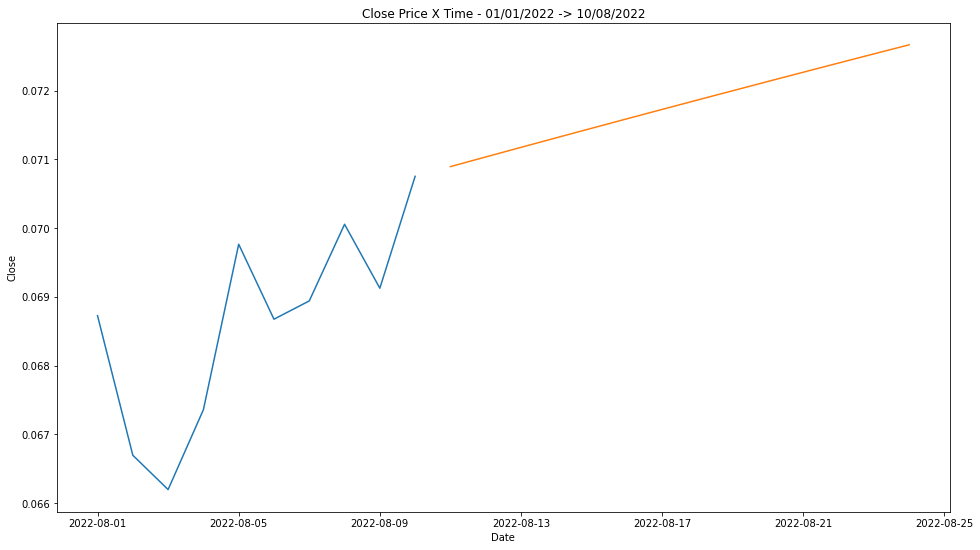

In [308]:
# Plot the prediction 
fig, ax = plt.subplots(1, figsize = (16, 9))
sns.lineplot(x = df5[(df5['Date'] >= '08/01/2022') & (df5['Date'] <= '09/08/2022')]['Date'], y = 'Close', data = df5, ax = ax)
sns.lineplot(x = 'Date', y = 'Close', data = forecast, ax = ax)
plt.title('Close Price X Time - 01/08/2022 -> 24/08/2022')
plt.show();